<a href="https://colab.research.google.com/github/arifRusly/test/blob/master/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: This is a sentiment analysis program that prases the tweets fetched from Twitter using python

In [0]:
# import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re # regular expression
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
# twitter api credentials
consumerKey = 'Enter your consumer key'
consumerSecret = 'Enter your consumer secret'
accessToken = 'Enter your access token'
accessTokenSecret = 'Enter your access token secret'

In [0]:
# Create the authenticate object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the api object while passing in the aut information
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [42]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = 'Trump', count = 100, lang ='eng', tweet_mode = 'extended')

# print the last 5 tweets from the account
print('Show the 5 recent tweets: \n')
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i = i + 1

Show the 5 recent tweets: 

1) Looking to improve your golf game from home? Introducing #VirtualGolfLessons with @TrumpGolf! Today we are taking you down to @TrumpPalmBeach to learn how to perfect your golf grip 🏌 https://t.co/WFXLwgTgmb https://t.co/o7Z3QIm7bF

2) RT @TrumpRealty: Discover the latest edition of our 2020 First Quarter Luxury Market Report providing an exclusive look into Manhattan’s lu…

3) RT @EricTrump: On behalf of everyone at  @TrumpGolf, I can’t wait to welcome you all back home! The properties are impeccable and our amazi…

4) Our @TrumpHotels team is thrilled to announce that ALL eleven of our iconic destinations have earned nominations in @cntraveler’s 2020 Readers' Choice Awards! Cast your vote now at https://t.co/r6lTamagpb to share what you loved about your favorite Trump Hotels. https://t.co/pu5iDWoOtU

5) RT @TrumpGolf: Five-time @pgatour winner and close friend of the @TrumpGolf family, @b_dechambeau, is giving our followers an exclusive les…



In [43]:
# Create a dataframe with column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns =['Tweets'])

# Show the first 5 rows of data
df.head()

,Tweets
0,Looking to improve your golf game from home? I...
1,RT @TrumpRealty: Discover the latest edition o...
2,RT @EricTrump: On behalf of everyone at @Trum...
3,Our @TrumpHotels team is thrilled to announce ...
4,RT @TrumpGolf: Five-time @pgatour winner and c...


In [49]:
# Clean the data

# Create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','', text) # Remove the @mentions
  text = re.sub(r'#', '', text) # Removing the # symbol
  text = re.sub(r':', '', text) # Removing the : symbol
  text = re.sub(r'RT[\s]+', '', text) # REmoving the RT
  text = re.sub(r'https?:\/\/\S+', '', text) # REmoving the hyper link

  return text

# apply the function
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# show the cleaned text
df

,Tweets,Subjectivity,Polarity,Analysis
0,Looking to improve your golf game from home? I...,0.562963,0.114815,Positive
1,Discover the latest edition of our 2020 First...,0.616667,0.375000,Positive
2,"On behalf of everyone at , I can’t wait to w...",0.550000,0.516667,Positive
3,Our team is thrilled to announce that ALL ele...,0.750000,0.606250,Positive
4,Five-time winner and close friend of the fa...,0.000000,0.000000,Neutral
...,...,...,...,...
95,Did you know the richly luxurious guest rooms ...,0.583333,0.408333,Positive
96,Three of the most spectacular golf courses in ...,0.460000,0.320000,Positive
97,We hope everyone had a wonderful FourthOfJuly ...,1.000000,1.000000,Positive
98,No golf bucket list is complete without,0.400000,0.100000,Positive


In [50]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Creae a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity,Analysis
0,Looking to improve your golf game from home? I...,0.562963,0.114815,Positive
1,Discover the latest edition of our 2020 First...,0.616667,0.375000,Positive
2,"On behalf of everyone at , I can’t wait to w...",0.550000,0.516667,Positive
3,Our team is thrilled to announce that ALL ele...,0.750000,0.606250,Positive
4,Five-time winner and close friend of the fa...,0.000000,0.000000,Neutral
...,...,...,...,...
95,Did you know the richly luxurious guest rooms ...,0.583333,0.408333,Positive
96,Three of the most spectacular golf courses in ...,0.460000,0.320000,Positive
97,We hope everyone had a wonderful FourthOfJuly ...,1.000000,1.000000,Positive
98,No golf bucket list is complete without,0.400000,0.100000,Positive


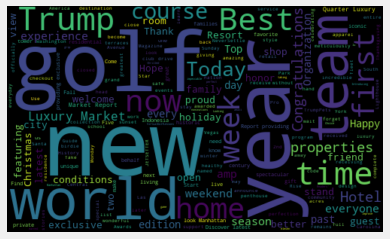

In [51]:
# to see how well these sentiments are distributed
# plot WORD CLOUD
allWords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

# SHow the wordCloud
plt.imshow(wordCloud, interpolation ='bilinear')
plt.axis('off')
plt.show()

In [52]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the data frame
df

,Tweets,Subjectivity,Polarity,Analysis
0,Looking to improve your golf game from home? I...,0.562963,0.114815,Positive
1,Discover the latest edition of our 2020 First...,0.616667,0.375000,Positive
2,"On behalf of everyone at , I can’t wait to w...",0.550000,0.516667,Positive
3,Our team is thrilled to announce that ALL ele...,0.750000,0.606250,Positive
4,Five-time winner and close friend of the fa...,0.000000,0.000000,Neutral
...,...,...,...,...
95,Did you know the richly luxurious guest rooms ...,0.583333,0.408333,Positive
96,Three of the most spectacular golf courses in ...,0.460000,0.320000,Positive
97,We hope everyone had a wonderful FourthOfJuly ...,1.000000,1.000000,Positive
98,No golf bucket list is complete without,0.400000,0.100000,Positive


In [54]:
# print all of the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])

for i in range (0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j + 1


1)Looking to improve your golf game from home? Introducing VirtualGolfLessons with ! Today we are taking you down to  to learn how to perfect your golf grip 🏌  

2) Discover the latest edition of our 2020 First Quarter Luxury Market Report providing an exclusive look into Manhattan’s lu…

3) On behalf of everyone at  , I can’t wait to welcome you all back home! The properties are impeccable and our amazi…

4)Our  team is thrilled to announce that ALL eleven of our iconic destinations have earned nominations in ’s 2020 Readers' Choice Awards! Cast your vote now at  to share what you loved about your favorite Trump Hotels. 

5)In honor of NationalGolfersDay, here’s a special message from our dear friend and golf legend _JohnDaly ⛳️ Hope everyone is staying safe and healthy!  

6)Each morning is a new beginning. A new opportunity to conquer any task at hand. Do it better. Never settle. While some of our properties may be closed for now, The  Organization, and all that we stand for, remain

In [56]:
# print all of the negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')

for i in range (0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j + 1

1) While some of our properties may be closed during this pandemic, the Trump Organization, and all that we stand for, remains…

2)Routed on over 500 acres and forged from what was previously flat and barren desert,  has become a preeminent destination in the golf world 🇦🇪 

3)Black Friday Starts Now! Take 25% Off EVERYTHING on  now through Monday  

4)A great boss is hard to find and impossible to forget.

Thank you to our fearless leaders for your motivation, mentorship and dedication to our team each and everyday NationalBossDay 

5)Everyday is InternationalDogDay for these TrumpPets 🐶   

6)The  is less than 2 weeks away! Train like the pros
at   



In [57]:
# print all of the Neutral tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])

for i in range (0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Neutral'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j + 1

1) Five-time  winner and close friend of the  family, _dechambeau, is giving our followers an exclusive les…

2)Revel in Hudson River views from every room of this state-of-the-art penthouse featuring 480 sq ft of exterior terraces  

3)Las Vegas Where the glow of the city’s architecture rivals that of Mother Nature’s skyline  

4)⭐⭐⭐⭐⭐ 

Congratulations to , ,  &amp;  for ALL receiving the prestigious  Travel Guide’s 2020 Five-Star Distinction!  

5)Can't leave home without your four-legged friend? With our TrumpPets program, you don't have to!   

6)All roads lead to  🌃   NeverSettle 

7)No better place to spend the first week of winter ❄️  NewYork 

8)Look who decided to make a surprise appearance at the  Christmas Party this year 🎅 Santa  

9)Two weeks until Christmas, and we're celebrating with a holiday dash! Today only, receive 40% off holiday favorites  

10)The  Club is officially open for the 2019/2020 season!  

11)It’s YUGEEE! 

12)Calling all snowbirds!  is just the escape

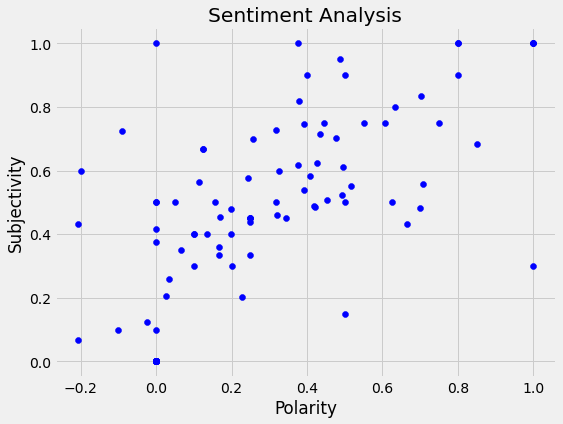

In [58]:
# plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range (0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [60]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round ( (ptweets.shape[0] / df.shape[0]) * 100, 1)

69.0

In [61]:
# Get the percentage of negative tweets
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['Tweets']

round ( (ptweets.shape[0] / df.shape[0]) * 100, 1)

6.0

In [62]:
# Get the percentage of neutral tweets
ptweets = df[df.Analysis == 'Neutral']
ptweets = ptweets['Tweets']

round ( (ptweets.shape[0] / df.shape[0]) * 100, 1)

25.0

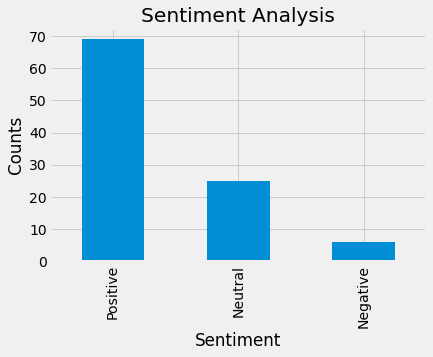

In [64]:
# Show the value counts
df['Analysis'].value_counts()

# print and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()